In [1]:
%matplotlib inline

In [2]:
import datetime
import numpy
import pandas

In [3]:
df1 = pandas.read_csv("uproot-pip-to2018-09-05.csv",
                      parse_dates=[0],
                      infer_datetime_format=True)
df2 = pandas.read_csv("uproot-pip-to2019-01-01.csv",
                      parse_dates=[0],
                      infer_datetime_format=True)
df3 = pandas.read_csv("uproot-pip-to2019-02-22.csv",
                      parse_dates=[0],
                      infer_datetime_format=True)

df = pandas.concat([df1, df2, df3])
df.columns, len(df)

(Index(['timestamp', 'country_code', 'file_version', 'details_distro_name',
        'details_distro_version', 'details_system_name',
        'details_system_release', 'details_cpu'],
       dtype='object'), 25730)

In [4]:
uniqueness = df[["country_code", "details_distro_name", "details_distro_version",
                 "details_system_name", "details_system_release"]].apply(
    lambda x: ",".join(str(y) for y in x), axis=1)
df["uniqueness"] = uniqueness
df.drop_duplicates(["uniqueness"], inplace=True)
len(df)

1504

In [5]:
df["timestamp"].max() - df["timestamp"].min()

Timedelta('526 days 19:31:51')

/usr/local/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


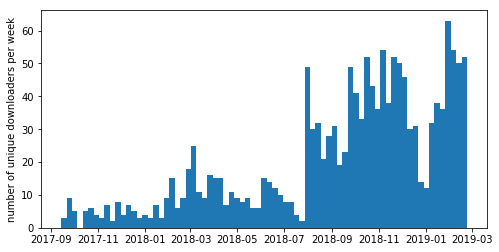

In [6]:
fig = df["timestamp"].hist(bins=526 // 7, grid=False, figsize=(8, 4))
fig.set_ylabel("number of unique downloaders per week")
fig.get_figure().savefig("uproot-pip-vsweek.pdf")

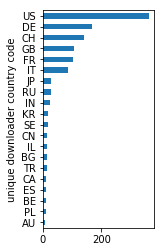

In [7]:
df2 = df.groupby("country_code").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 8].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("unique downloader country code")
fig.get_figure().savefig("uproot-pip-vscountry.pdf")

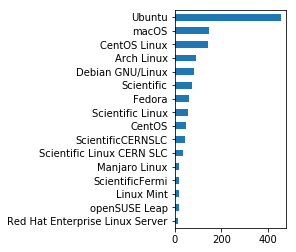

In [8]:
df2 = df.groupby("details_distro_name").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 8].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsos.pdf")

In [9]:
df["distro-country"] = df[["details_distro_name", "country_code"]].apply(
    lambda x: "{} ({})".format(x[0], x[1]), axis=1)

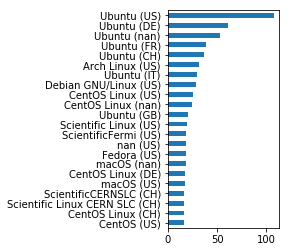

In [10]:
df2 = df.groupby("distro-country").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 15].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsoscountry.pdf")

In [11]:
df["system-name-version"] = df[["details_system_name", "details_system_release"]].apply(
    lambda x: "{} {}".format(x[0], x[1] if x[0] != "Linux" else ".".join(x[1].split(".")[:2])), axis=1)

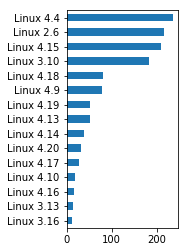

In [12]:
df2 = df[df["details_system_name"] == "Linux"].groupby("system-name-version").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 10].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsosbasic-linux.pdf")

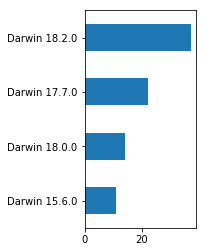

In [13]:
df2 = df[df["details_system_name"] == "Darwin"].groupby("system-name-version").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 10].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsosbasic-mac.pdf")

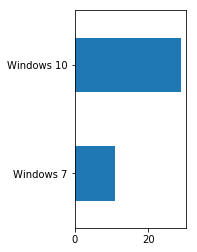

In [14]:
df2 = df[df["details_system_name"] == "Windows"].groupby("system-name-version").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 10].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsosbasic-windows.pdf")

In [15]:
df1 = pandas.read_csv("uproot-pip-to2018-09-05.csv",
                      parse_dates=[0],
                      infer_datetime_format=True)
df2 = pandas.read_csv("uproot-pip-to2019-01-01.csv",
                      parse_dates=[0],
                      infer_datetime_format=True)
df3 = pandas.read_csv("uproot-pip-to2019-02-22.csv",
                      parse_dates=[0],
                      infer_datetime_format=True)

df = pandas.concat([df1, df2, df3])
df.columns, len(df)
uniqueness = df[["country_code", "details_distro_name", "details_distro_version",
                 "details_system_name", "details_system_release"]].apply(
    lambda x: ",".join(str(y) for y in x), axis=1)
df["uniqueness"] = uniqueness

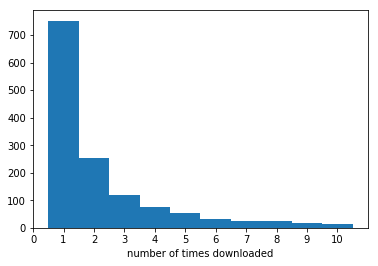

In [16]:
df2 = df.groupby("uniqueness").count().sort_values("timestamp", ascending=False)
fig = df2["timestamp"].hist(bins=numpy.linspace(0.5, 10.5, 11), grid=False)
fig.set_xlabel("number of times downloaded")
fig.set_xticks(range(10 + 1))
fig.get_figure().savefig("uproot-pip-numdownloads.pdf")